<a href="https://colab.research.google.com/github/beb3k/Project-2/blob/main/PROJECT_2_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/PROJECT 2/DATASET/fraudTrain.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
#Seleksi fitur dengan drop kolom
dropped_columns = [['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'job', 'trans_num']]
df = df.drop(columns=dropped_columns, axis=1)
df.to_csv('df_feature_selected.csv', index=False)

KeyError: "[('Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'gender', 'street', 'city', 'job', 'trans_num')] not found in axis"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/PROJECT 2/DATASET/fraudTrainFeatureSelected.csv')

In [ ]:
df.head(10)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,gas_transport,94.63,PA,18917,40.3750,-75.2045,2158,1961-06-19,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,grocery_net,44.54,KS,67851,37.9931,-100.9893,2691,1993-08-16,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,gas_transport,71.65,VA,22824,38.8432,-78.6003,6018,1947-08-21,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,misc_pos,4.27,PA,15665,40.3359,-79.6607,1472,1941-03-07,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,grocery_pos,198.39,TN,37040,36.5220,-87.3490,151785,1974-03-28,1325376361,37.179198,-87.485381,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   state                  1296675 non-null  object 
 4   zip                    1296675 non-null  int64  
 5   lat                    1296675 non-null  float64
 6   long                   1296675 non-null  float64
 7   city_pop               1296675 non-null  int64  
 8   dob                    1296675 non-null  object 
 9   unix_time              1296675 non-null  int64  
 10  merch_lat              1296675 non-null  float64
 11  merch_long             1296675 non-null  float64
 12  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 128.6+ MB


##EDA Fitur kategorikal

In [ ]:
# Statistik fitur kategorik dasar
cat_feat = df[['category', 'state']]

## modus
mod_cat = cat_feat.mode()
print(mod_cat)

## untuk setiap nilai pada kolom fitur kategorik
for col in cat_feat:
  print(f"--- {col} ---")
  print("Jumlah:\n", df[col].value_counts())
  print("Jumlah unik:", df[col].nunique())
  print("\n")

        category state
0  gas_transport    TX
--- category ---
Jumlah:
 category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64
Jumlah unik: 14


--- state ---
Jumlah:
 state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT  

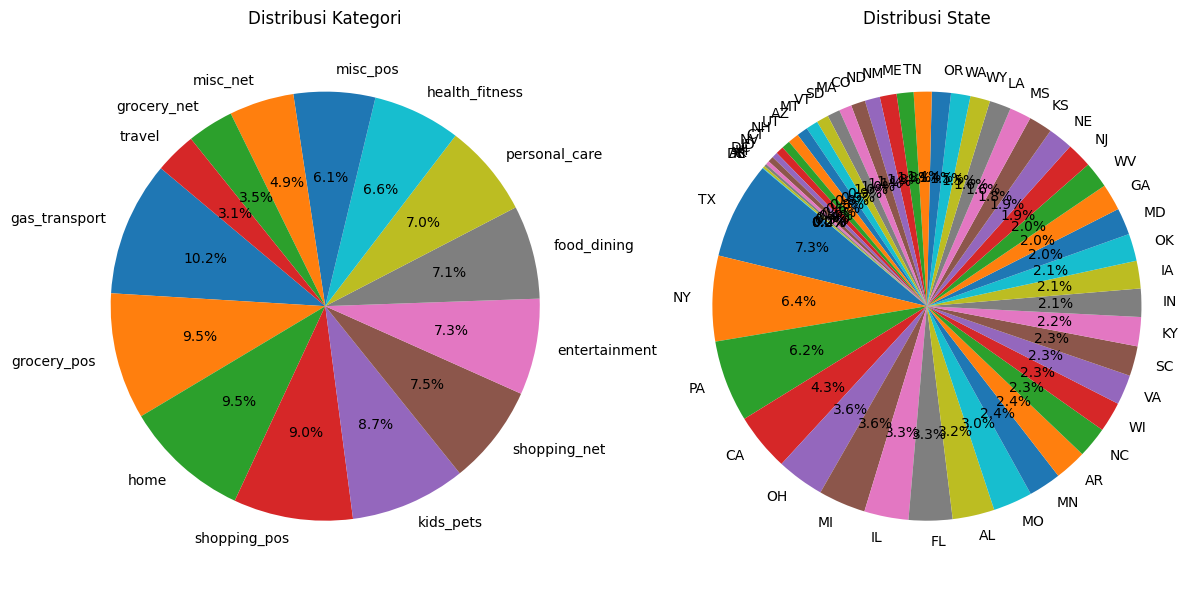

In [ ]:
# Visualisasi univariat
vis_cat = df['category'].value_counts()
vis_state = df['state'].value_counts()

import matplotlib.pyplot as plt

## Create separate pie charts
plt.figure(figsize=(12, 6))

## Pie chart for 'category'
plt.subplot(1, 2, 1)
vis_cat = df['category'].value_counts()
plt.pie(vis_cat, labels=vis_cat.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Kategori')
plt.axis('equal')

## Pie chart for 'state'
plt.subplot(1, 2, 2)
vis_state = df['state'].value_counts()
plt.pie(vis_state, labels=vis_state.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi State')
plt.axis('equal')

plt.tight_layout()
plt.show()

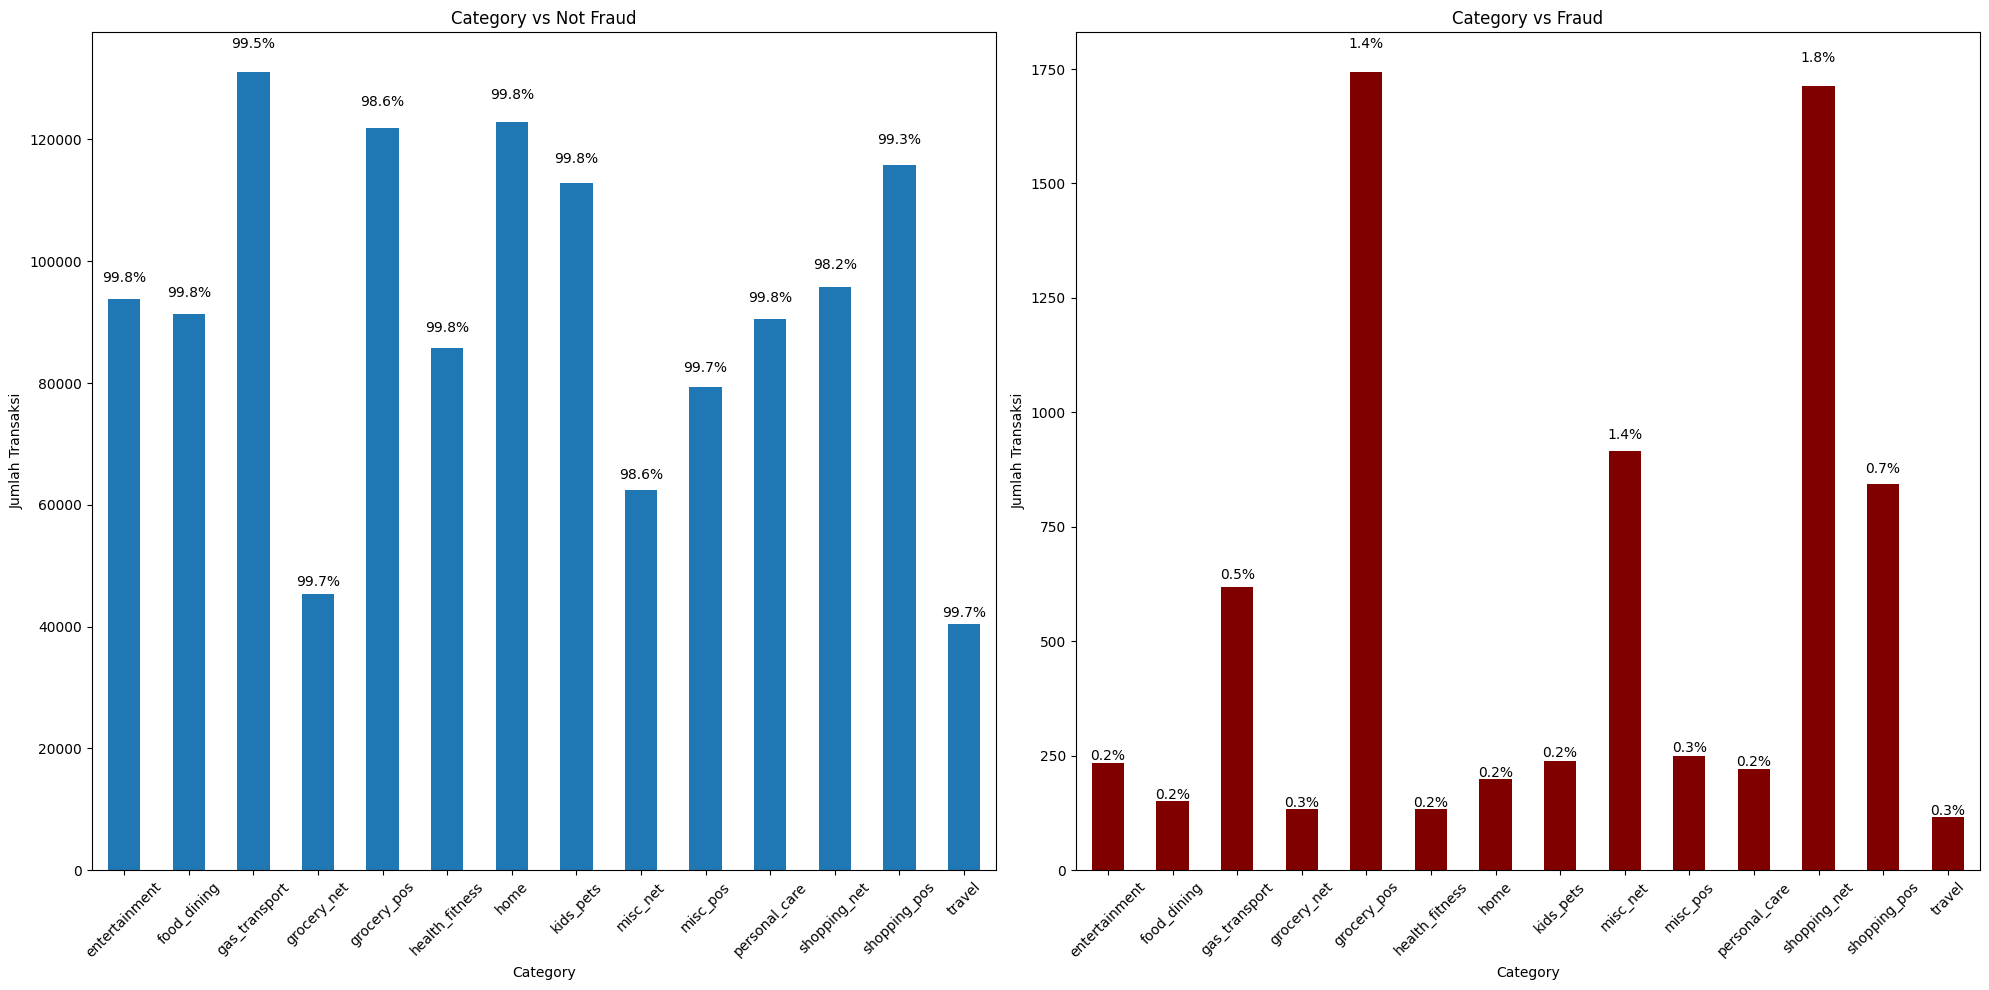

category
entertainment      93781
food_dining        91310
gas_transport     131041
grocery_net        45318
grocery_pos       121895
health_fitness     85746
home              122917
kids_pets         112796
misc_net           62372
misc_pos           79405
personal_care      90538
shopping_net       95830
shopping_pos      115829
travel             40391
Name: 0, dtype: int64
category
entertainment      233
food_dining        151
gas_transport      618
grocery_net        134
grocery_pos       1743
health_fitness     133
home               198
kids_pets          239
misc_net           915
misc_pos           250
personal_care      220
shopping_net      1713
shopping_pos       843
travel             116
Name: 1, dtype: int64


In [ ]:
# Visualisasi bivariat

## Crosstabulasi
category_fraud = pd.crosstab(df['category'], df['is_fraud'])

## Pemisahan
not_fraud = category_fraud[0]  # 'Not Fraud' column
fraud = category_fraud[1]  # 'Fraud' column

## Kalkulasi persentase untuk tambahin diatas bar nanti
total_per_category = not_fraud + fraud
persentase_not_fraud = (not_fraud / total_per_category)*100
persentase_fraud = (fraud / total_per_category)*100

## Plotting
plt.figure(figsize=(20, 10))

### Plotting category vs not fraud
plt.subplot (1, 2, 1)
not_fraud.plot(kind='bar')
plt.title('Category vs Not Fraud')
plt.xlabel('Category')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

for p0, percentage in enumerate(persentase_not_fraud):
  height0 = not_fraud.iloc[p0]
  plt.text(p0, height0 + height0*0.03, f'{percentage:.1f}%', ha='center')

## Plotting category vs fraud
plt.subplot (1, 2, 2)
fraud.plot(kind='bar', color='maroon')
plt.title('Category vs Fraud')
plt.xlabel('Category')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

for p1, percentage in enumerate(persentase_fraud):
  height1 = fraud.iloc[p1]
  plt.text(p1, height1 + height1*0.03, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print(not_fraud)
print(fraud)


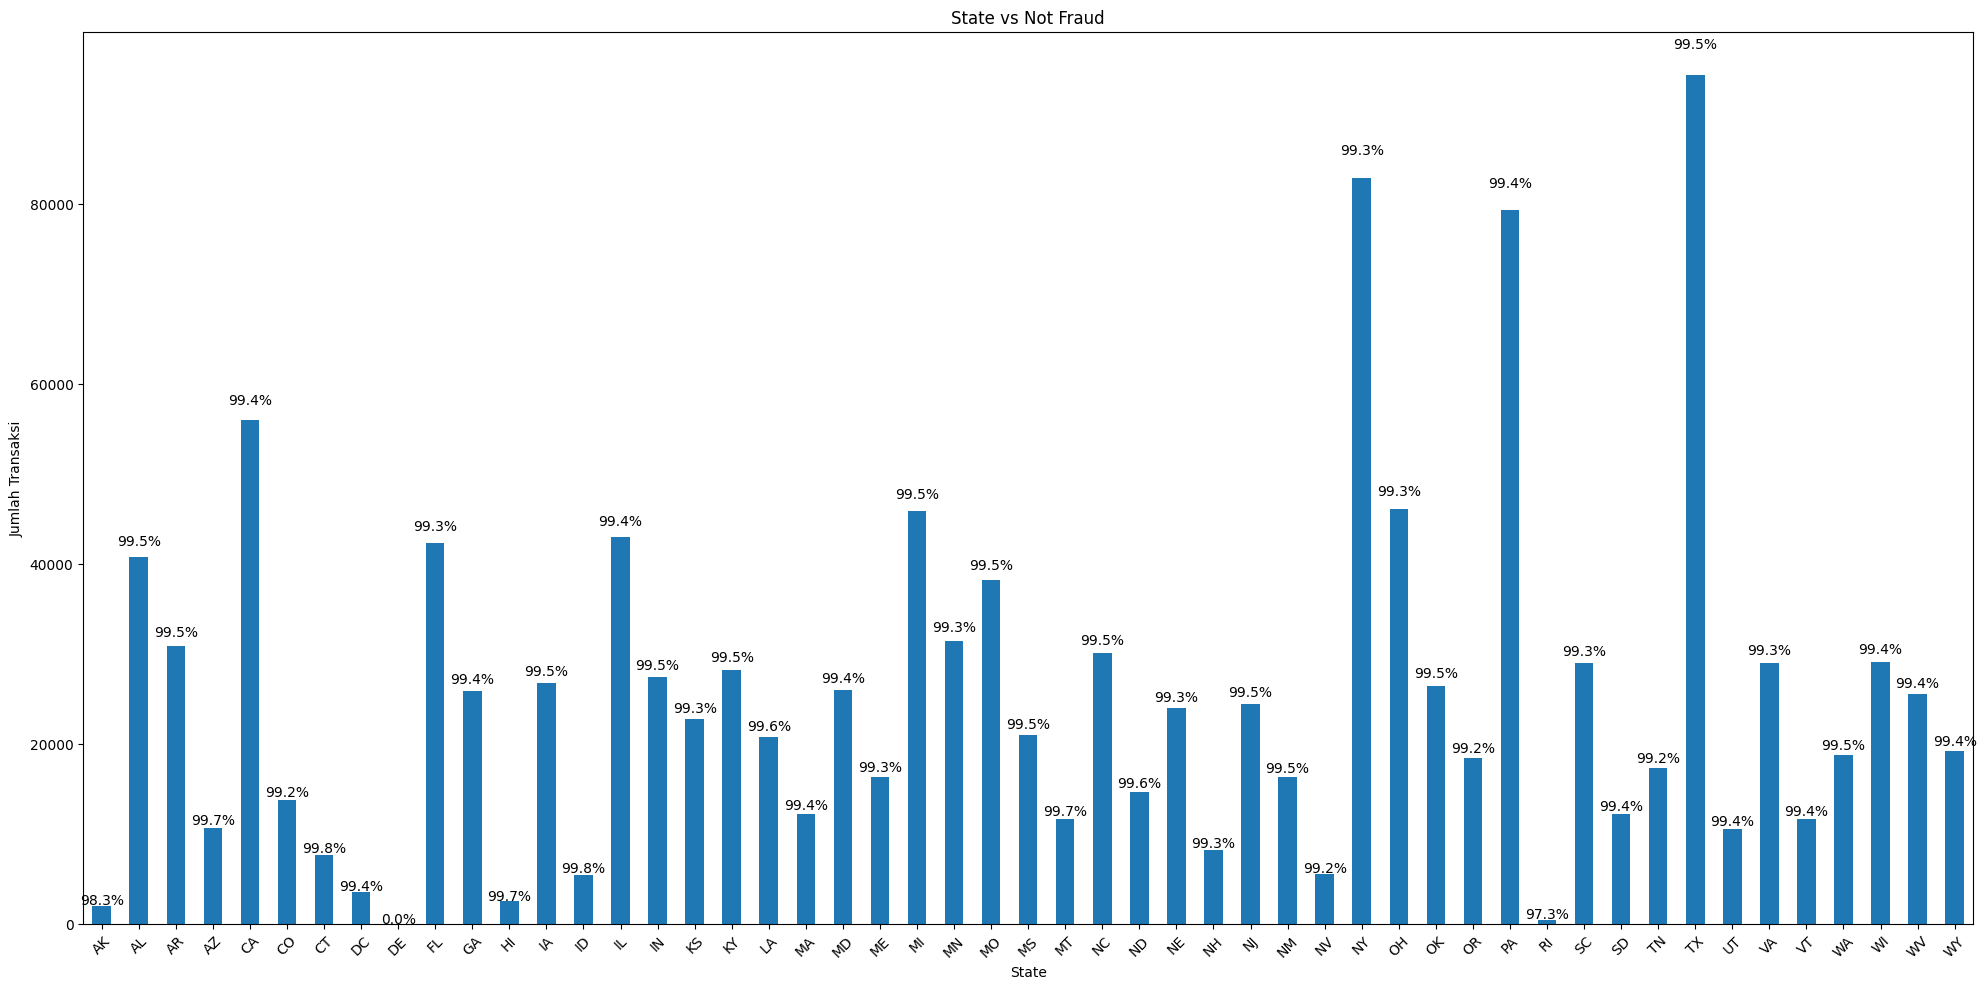

state
AK     2084
AL    40774
AR    30966
AZ    10733
CA    56034
CO    13767
CT     7686
DC     3592
DE        0
FL    42390
GA    25917
HI     2552
IA    26843
ID     5534
IL    43004
IN    27438
KS    22840
KY    28320
LA    20874
MA    12307
MD    26036
ME    16386
MI    45916
MN    31507
MO    38212
MS    21073
MT    11722
NC    30117
ND    14729
NE    23988
NH     8219
NJ    24485
NM    16325
NV     5560
NY    82946
OH    46159
OK    26528
OR    18448
PA    79389
RI      535
SC    28997
SD    12250
TN    17414
TX    94397
UT    10638
VA    29052
VT    11696
WA    18828
WI    29205
WV    25545
WY    19212
Name: 0, dtype: int64


In [ ]:
state_fraud = pd.crosstab(df['state'], df['is_fraud'])

not_fraud = state_fraud[0]
fraud = state_fraud[1]

total_per_state = not_fraud + fraud
persentase_not_fraud = (not_fraud / total_per_state)*100
persentase_fraud = (fraud / total_per_state)*100

plt.figure(figsize=(20,10))
not_fraud.plot(kind='bar')
plt.title('State vs Not Fraud')
plt.xlabel('State')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

for p0, percentage in enumerate(persentase_not_fraud):
  height0 = not_fraud.iloc[p0]
  plt.text(p0, height0 + height0*0.03, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print(not_fraud)

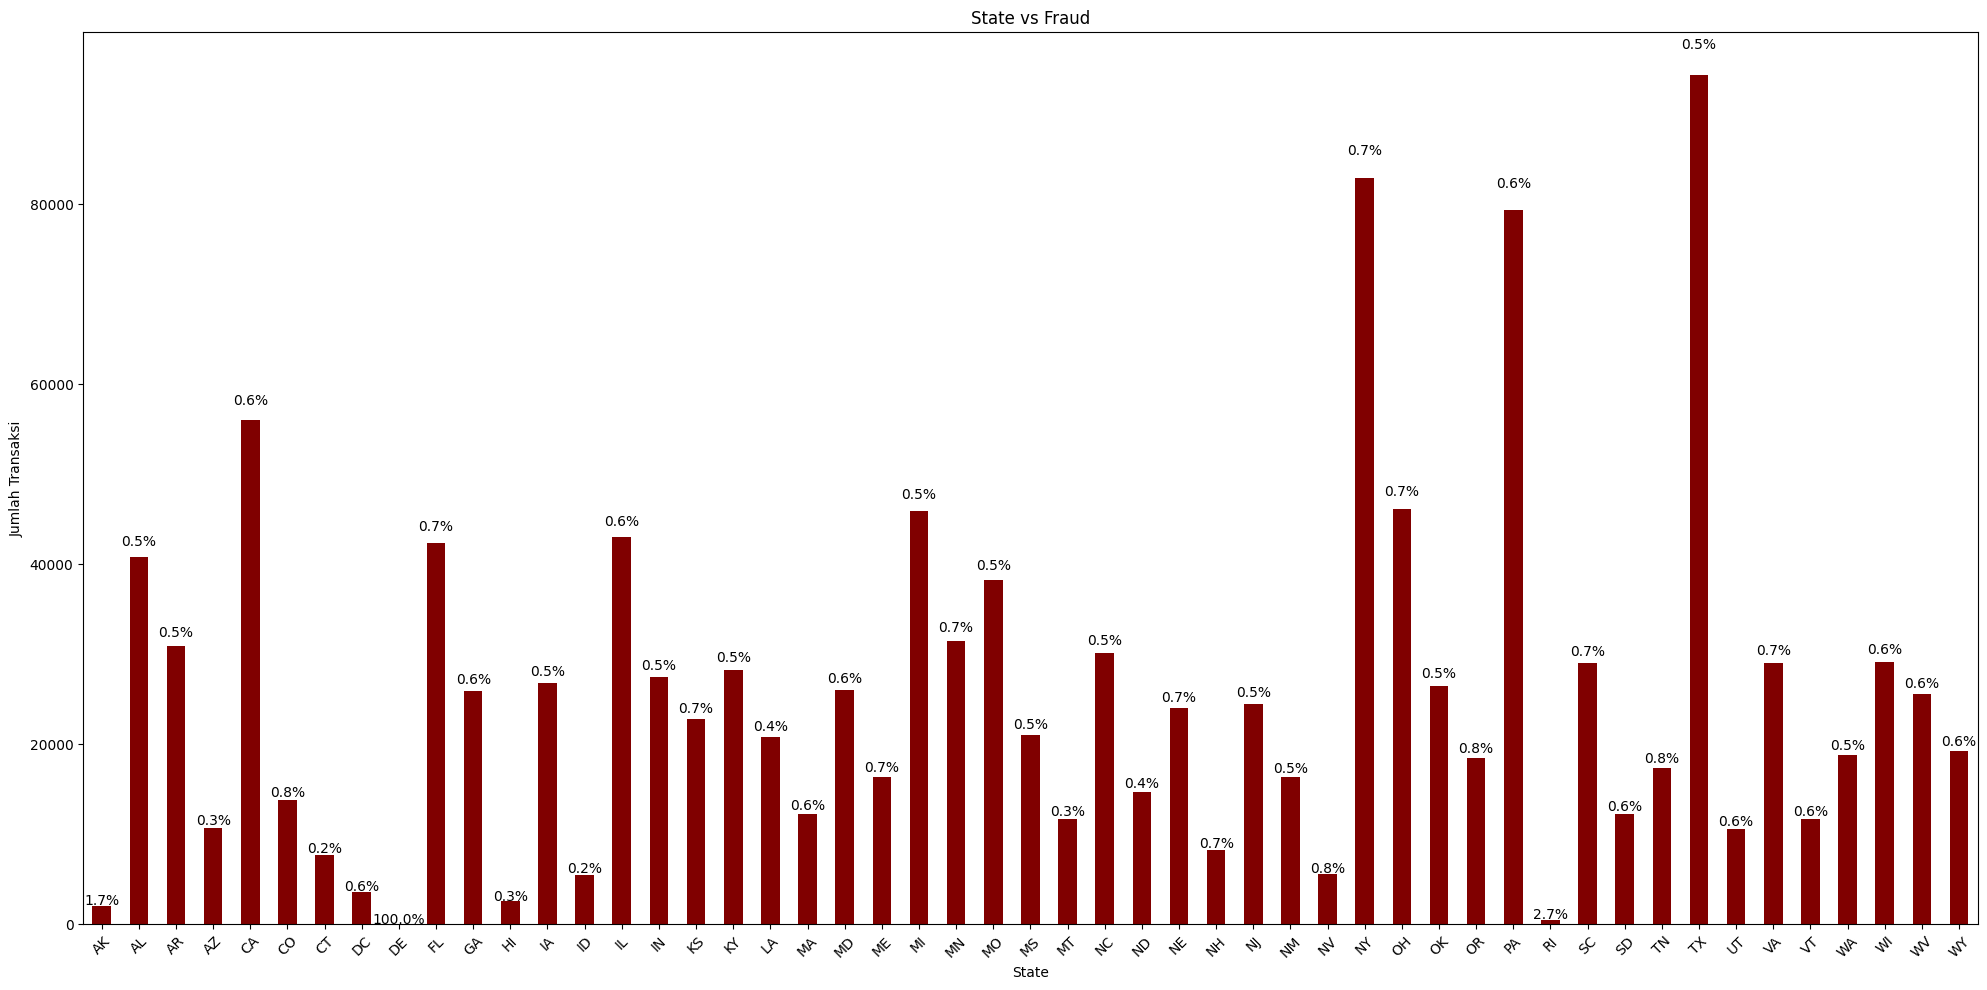

state
AK     36
AL    215
AR    161
AZ     37
CA    326
CO    113
CT     16
DC     21
DE      9
FL    281
GA    146
HI      7
IA    142
ID     11
IL    248
IN    142
KS    156
KY    155
LA     91
MA     69
MD    157
ME    119
MI    238
MN    207
MO    191
MS    115
MT     32
NC    149
ND     57
NE    180
NH     59
NJ    118
NM     82
NV     47
NY    555
OH    321
OK    143
OR    149
PA    458
RI     15
SC    193
SD     74
TN    140
TX    479
UT     61
VA    198
VT     72
WA     96
WI    163
WV    146
WY    110
Name: 1, dtype: int64


In [ ]:
plt.figure(figsize=(20,10))
not_fraud.plot(kind='bar', color='maroon')
plt.title('State vs Fraud')
plt.xlabel('State')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

for p0, percentage in enumerate(persentase_fraud):
  height0 = not_fraud.iloc[p0]
  plt.text(p0, height0 + height0*0.03, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print(fraud)

# Feature Engineering

## long, lat, merch_long, merch_lat

In [ ]:
# Fitur baru menggabungkan long, lat, dan merch_long, merch_lat untuk mengukur jarak customer dan merchant (Haversine)

import pandas as pd
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of Earth in kilometers. Use 3956 for miles
    r = 6371

    # Calculate the result
    return c * r

# Apply haversine formula to your DataFrame
def calculate_distance(df):
    df['dist'] = df.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)

# Calculate distances
calculate_distance(df)

In [ ]:
df.head(10)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744
5,2019-01-01 00:04:08,gas_transport,94.63,PA,18917,40.3750,-75.2045,2158,1961-06-19,1325376248,40.653382,-76.152667,0,85.922643
6,2019-01-01 00:04:42,grocery_net,44.54,KS,67851,37.9931,-100.9893,2691,1993-08-16,1325376282,37.162705,-100.153370,0,118.119776
7,2019-01-01 00:05:08,gas_transport,71.65,VA,22824,38.8432,-78.6003,6018,1947-08-21,1325376308,38.948089,-78.540296,0,12.766923
8,2019-01-01 00:05:18,misc_pos,4.27,PA,15665,40.3359,-79.6607,1472,1941-03-07,1325376318,40.351813,-79.958146,0,25.270494
9,2019-01-01 00:06:01,grocery_pos,198.39,TN,37040,36.5220,-87.3490,151785,1974-03-28,1325376361,37.179198,-87.485381,0,74.077750


## dist

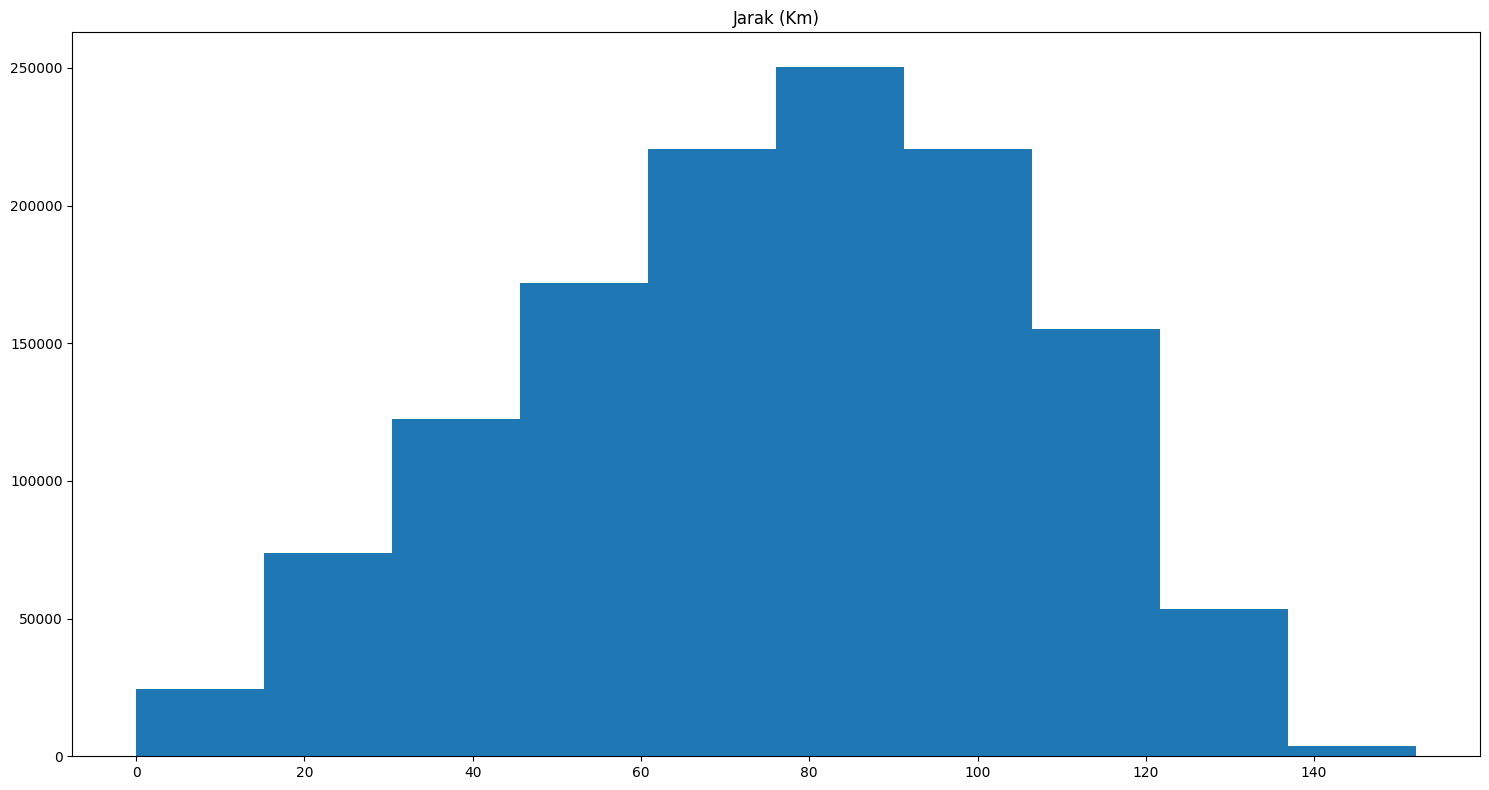

In [ ]:
# Cek distribusi fitur baru 'dist'

dist = df['dist']

plt.figure(figsize=(15, 8))
plt.hist(dist)
plt.title('Jarak (Km)')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

stats = df['dist'].describe()

# Iterate through the stats and format each value
for stat_name, stat_value in stats.items():
    print(f"{stat_name}: {stat_value:.2f}")

count: 1296675.00
mean: 76.11
std: 29.12
min: 0.02
25%: 55.33
50%: 78.23
75%: 98.50
max: 152.12


In [ ]:
import pandas as pd

# Defiisikan interval binning
mean = 76.11
std = 29.12

# Definisikan 'edges' interval
bin_edges = [0, mean - 2*std, mean + std, float('inf')]

# Lebeling
bin_labels = ['near', 'medium', 'far']

# Binning dengan pd.cut()
df['dist_bin'] = pd.cut(df['dist'], bins=bin_edges, labels=bin_labels, include_lowest=True)

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,medium
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,medium
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,far
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,medium
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,medium


In [ ]:
import pandas as pd

# Lihat 'value counts' untuk tiap lebel bin
value_counts_dist = df['dist_bin'].value_counts()
print(value_counts_dist)


dist_bin
medium    1033334
far        229622
near        33719
Name: count, dtype: int64


In [ ]:
# One-hot encoding untuk 'dist'
import pandas as pd

df = pd.get_dummies(df, columns=['dist_bin'])

df.head(5)


,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False


## category, state

In [ ]:
# lihat unique values untuk 'category'

n_unique_values_category = df['category'].nunique()

list_unique_values_category = df['category'].unique()

print(f"Number of unique values: {n_unique_values_category}")
print(f"Unique values: {list_unique_values_category}")

Number of unique values: 14
Unique values: ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


In [ ]:
# binning 'category' menjadi 2 kategori saja --> esensial, non-esensial
import pandas as pd

df['combined_category'] = df['category'].replace(to_replace=r'(_net|_pos)$', value='_combined', regex=True)

essential_categories = ['grocery_combined', 'health_fitness', 'personal_care', 'home', 'food_dining']
non_essential_categories = ['misc_combined', 'entertainment', 'gas_transport', 'shopping_combined', 'travel', 'kids_pets']

df['cat_binned'] = df['combined_category'].apply(lambda x: 'essential' if x in essential_categories else 'non-essential')

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,combined_category,cat_binned
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,misc_combined,non-essential
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,grocery_combined,essential
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,entertainment,non-essential
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,gas_transport,non-essential
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,misc_combined,non-essential


In [ ]:
df = df.drop(columns='combined_category', axis=1)

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,cat_binned
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,non-essential
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,essential
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,non-essential
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,non-essential
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,non-essential


In [ ]:
# binning 'state' menjadi 'region' berdasar (https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf)

import pandas as pd

# Mappins 'state' ke 'region'
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
    'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West', 'DC': 'South'
}

df['region'] = df['state'].map(state_to_region)

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,cat_binned,region
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,non-essential,South
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,essential,West
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,non-essential,West
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,non-essential,West
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,non-essential,South


In [ ]:
# One-hot encoding 'state'
import pandas as pd

df = pd.get_dummies(df, columns=['region', 'cat_binned'])

df.head(5)


,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,region_Midwest,region_Northeast,region_South,region_West,cat_binned_essential,cat_binned_non-essential
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,False,False,True,False,False,True
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,False,False,False,True,True,False
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,False,False,False,True,False,True
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,False,False,False,True,False,True
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,False,False,True,False,False,True


In [ ]:
df.to_csv('encoded1.csv', index=False)

## dob

In [ ]:
# inferensi umur dari 'dob' ke fitur 'age'
import pandas as pd
from datetime import datetime

df['dob'] = pd.to_datetime(df['dob'])

current_year = datetime.now().year
df['age'] = current_year - df['dob'].dt.year

def adjust_age(row):
    if (row['dob'].month, row['dob'].day) > (datetime.now().month, datetime.now().day):
        return row['age'] - 1
    else:
        return row['age']

df['age'] = df.apply(adjust_age, axis=1)

df[['dob', 'age']].head(5)


,dob,age
0,1988-03-09,36
1,1978-06-21,45
2,1962-01-19,62
3,1967-01-12,57
4,1986-03-28,38


In [ ]:
import pandas as pd

stats = df['age'].describe()

# Iterate through the stats and format each value
for stat_name, stat_value in stats.items():
    print(f"{stat_name}: {stat_value:.2f}")

count: 1296675.00
mean: 50.00
std: 17.40
min: 19.00
25%: 37.00
50%: 48.00
75%: 61.00
max: 99.00


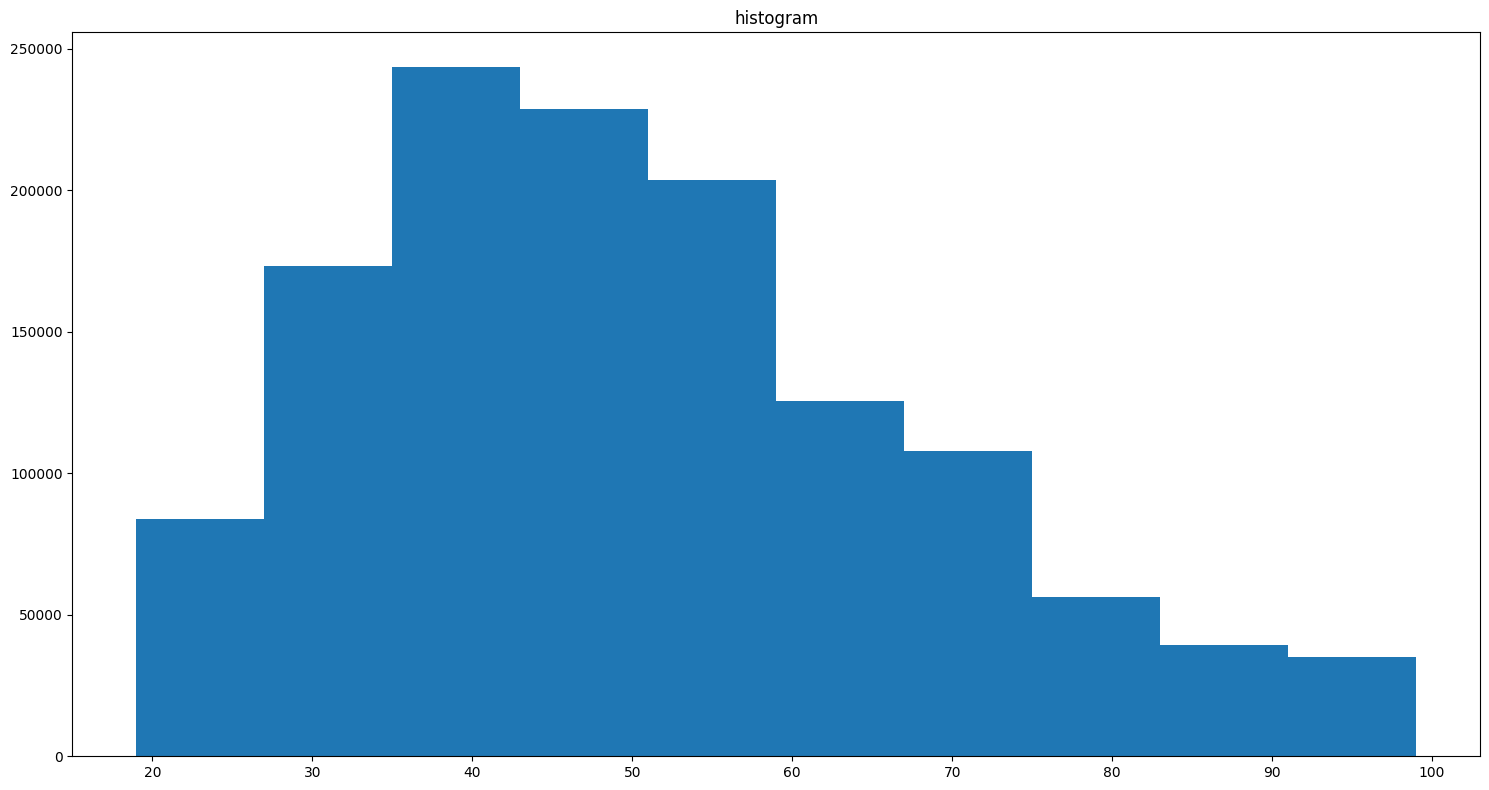

In [ ]:
import matplotlib.pyplot as plt

dist = df['age']

plt.figure(figsize=(15, 8))
plt.hist(dist)
plt.title('histogram')

plt.tight_layout()
plt.show()

In [ ]:
#binning 'age' ke fitur baru 'age_group'

import pandas as pd

bins = [18, 35, 58, 99]
labels = ['muda', 'paruhbaya', 'tua']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

print(df[['age', 'age_group']].head())


   age  age_group
0   36  paruhbaya
1   45  paruhbaya
2   62        tua
3   57  paruhbaya
4   38  paruhbaya


In [ ]:
#One-hot encoding 'age_group'
import pandas as pd

df = pd.get_dummies(df, columns=['age_group'])

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,region_Midwest,region_Northeast,region_South,region_West,cat_binned_essential,cat_binned_non-essential,age,age_group_muda,age_group_paruhbaya,age_group_tua
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,False,False,True,False,False,True,36,False,True,False
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,False,False,False,True,True,False,45,False,True,False
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,False,False,False,True,False,True,62,False,False,True
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,False,False,False,True,False,True,57,False,True,False
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,False,False,True,False,False,True,38,False,True,False


##zip

In [ ]:
#unique count dan value count 'zip'
import pandas as pd

n_unique_values_zip = df['zip'].nunique()
value_counts_zip = df['zip'].value_counts()

# Print the value counts
print(f"Number of unique values: {n_unique_values_zip}")
print(value_counts_zip)



Number of unique values: 970
zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64


In [ ]:
# profiling multivariat terhadap 'zip'
import pandas as pd

# Step 1: Aggregasi data berdasar 'zip'
zip_profile = df.groupby('zip').agg(
    total_transactions=('amt', 'count'),
    total_amt=('amt', 'sum'),
    average_amt=('amt', 'mean'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Step 2: Kalkulasi 'fraud rate' per zipcode
zip_profile['fraud_rate'] = zip_profile['fraud_transactions'] / zip_profile['total_transactions']

# Tampilan data
print(zip_profile.sort_values(by='fraud_rate', ascending=False).head(10))

       zip  total_transactions  total_amt  average_amt  fraud_transactions  \
485  47842                  12    8131.43   677.619167                  12   
760  74108                  10    5857.35   585.735000                  10   
160  16428                   9    8265.83   918.425556                   9   
154  16214                   9    4944.02   549.335556                   9   
646  62896                  13    6751.81   519.370000                  13   
151  16041                   7    6121.54   874.505714                   7   
663  63966                   8    6737.85   842.231250                   8   
668  64080                   8    1348.53   168.566250                   8   
690  67346                   9    6271.37   696.818889                   9   
699  68375                  19    8431.93   443.785789                  19   

     fraud_rate  
485         1.0  
760         1.0  
160         1.0  
154         1.0  
646         1.0  
151         1.0  
663         1.0

In [ ]:
print(zip_profile.sort_values(by='total_amt', ascending=False).head(10))

       zip  total_transactions  total_amt  average_amt  fraud_transactions  \
442  44233                3110  296436.73    95.317277                   0   
785  76050                3039  290478.49    95.583577                   3   
757  73754                3646  286487.59    78.575861                  16   
735  72042                3106  284013.50    91.440277                  14   
871  85173                3119  280008.05    89.774944                   7   
838  80120                3090  278325.97    90.073129                   0   
261  28405                3101  278139.27    89.693412                   2   
180  19149                3026  278042.99    91.884663                   0   
726  70808                3064  277085.65    90.432653                   0   
517  49854                3027  275930.63    91.156468                   4   

     fraud_rate  
442    0.000000  
785    0.000987  
757    0.004388  
735    0.004507  
871    0.002244  
838    0.000000  
261    0.000645

In [ ]:
import pandas as pd

# Lihat 'value counts' berdasar 'fraud_rate
value_counts_fraud_rate = zip_profile['fraud_rate'].value_counts().head(10)
print(value_counts_fraud_rate)

fraud_rate
0.000000    216
1.000000     73
0.007744      4
0.010587      4
0.007797      3
0.021113      3
0.015414      3
0.017308      3
0.008763      3
0.003953      3
Name: count, dtype: int64


In [ ]:
# kategorisasi 'fraud_risk' berdasarkan 'fraud_rate' untuk setiap 'zip' dan masukkan data ke 'df' dari 'zip_profile'

import pandas as pd

# Definisi fungsi untuk binning 'fraud_rate' menajdi fitur baru 'fraud_risk' berdasar parameter dibawah
def classify_fraud_risk(rate):
    if rate == 1:
        return 'high risk'
    elif rate == 0:
        return 'low risk'
    else:
        return 'medium risk'

# Mapping 'fraud_risk' untuk setiap 'zip' di dataframe 'zip_profile'
zip_profile['fraud_risk'] = zip_profile['fraud_rate'].apply(classify_fraud_risk)
zip_to_risk_mapping = zip_profile.set_index('zip')['fraud_risk'].to_dict()

# assign 'fraud_risk' dari dataframe 'zip_profile' ke dataframe awal 'df'
df['fraud_risk'] = df['zip'].map(zip_to_risk_mapping)

# Display
print(df[['zip', 'fraud_risk']].head())

     zip   fraud_risk
0  28654     low risk
1  99160     low risk
2  83252     low risk
3  59632  medium risk
4  24433     low risk


In [ ]:
# Fitur baru 'avg_trans_amt' dengan menggunakan rata-rata 'average_amt' dari tiap value 'fraud_rate'

import pandas as pd

# kalkulasi mean untuk bin fraud_rate (fraud_risk)
low_risk_avg_amt = zip_profile.loc[zip_profile['fraud_rate'] == 0, 'average_amt'].mean()
medium_risk_avg_amt = zip_profile.loc[(zip_profile['fraud_rate'] > 0) & (zip_profile['fraud_rate'] < 1), 'average_amt'].mean()
high_risk_avg_amt = zip_profile.loc[zip_profile['fraud_rate'] == 1, 'average_amt'].mean()

# mapping hasil kalkulasi ke setiap 'zip'
zip_profile['avg_trans_amt'] = zip_profile['fraud_rate'].apply(
    lambda x: high_risk_avg_amt if x == 1 else medium_risk_avg_amt if 0 < x < 1 else low_risk_avg_amt)

zip_avg_mapping = zip_profile.set_index('zip')['avg_trans_amt'].to_dict()

# Assign hasil mapping ke dataframe 'df'
df['avg_trans_amt'] = df['zip'].map(zip_avg_mapping)

# Display
print(df[['zip', 'avg_trans_amt']].head())


     zip  avg_trans_amt
0  28654      67.768567
1  99160      67.768567
2  83252      67.768567
3  59632      71.912691
4  24433      67.768567


In [ ]:
import pandas as pd

# Fitur baru 'trans_count_zip': rata-rata jumlah transaksi untuk tiap 'fraud_risk' yang di map ke 'zip'

# Hitung mean untuk jumlah transaksi tiap kategori 'fraud_risk'
avg_trans_counts = zip_profile.groupby('fraud_risk')['total_transactions'].mean()

# Mapping hasil kalkulasi mean ke 'fraud_risk' untuk tiap 'zip'
zip_profile['trans_count_zip'] = zip_profile['fraud_risk'].map(avg_trans_counts)

# Display
print(zip_profile[['zip', 'fraud_risk', 'trans_count_zip']].head())

    zip   fraud_risk  trans_count_zip
0  1257     low risk      1440.328704
1  1330  medium risk      1446.171806
2  1535  medium risk      1446.171806
3  1545     low risk      1440.328704
4  1612  medium risk      1446.171806


In [ ]:
import pandas as pd

df = pd.merge(df, zip_profile[['zip', 'trans_count_zip']], on='zip', how='left')

In [ ]:
# One-hot encoding fraud_risk

import pandas as pd

df = pd.get_dummies(df, columns=['fraud_risk'])

df.head(5)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,region_Midwest,region_Northeast,region_South,region_West,cat_binned_essential,cat_binned_non-essential,age,age_group_muda,age_group_paruhbaya,age_group_tua,avg_trans_amt,trans_count_zip_x,trans_count_zip_y,fraud_risk_high risk,fraud_risk_low risk,fraud_risk_medium risk
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,False,False,True,False,False,True,36,False,True,False,67.768567,1440.328704,1440.328704,False,True,False
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,False,False,False,True,True,False,45,False,True,False,67.768567,1440.328704,1440.328704,False,True,False
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,False,False,False,True,False,True,62,False,False,True,67.768567,1440.328704,1440.328704,False,True,False
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,False,False,False,True,False,True,57,False,True,False,71.912691,1446.171806,1446.171806,False,False,True
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,False,False,True,False,False,True,38,False,True,False,67.768567,1440.328704,1440.328704,False,True,False


In [ ]:
df = df.drop(columns='trans_count_zip_y', axis=1)
df = df.rename(columns={'trans_count_zip_x': 'trans_count_zip'})

df.head(10)

,trans_date_trans_time,category,amt,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,dist,dist_bin_near,dist_bin_medium,dist_bin_far,region_Midwest,region_Northeast,region_South,region_West,cat_binned_essential,cat_binned_non-essential,age,age_group_muda,age_group_paruhbaya,age_group_tua,avg_trans_amt,trans_count_zip,fraud_risk_high risk,fraud_risk_low risk,fraud_risk_medium risk
0,2019-01-01 00:00:18,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,78.597568,False,True,False,False,False,True,False,False,True,36,False,True,False,67.768567,1440.328704,False,True,False
1,2019-01-01 00:00:44,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,30.212176,False,True,False,False,False,False,True,True,False,45,False,True,False,67.768567,1440.328704,False,True,False
2,2019-01-01 00:00:51,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,108.206083,False,False,True,False,False,False,True,False,True,62,False,False,True,67.768567,1440.328704,False,True,False
3,2019-01-01 00:01:16,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,95.673231,False,True,False,False,False,False,True,False,True,57,False,True,False,71.912691,1446.171806,False,False,True
4,2019-01-01 00:03:06,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,77.556744,False,True,False,False,False,True,False,False,True,38,False,True,False,67.768567,1440.328704,False,True,False
5,2019-01-01 00:04:08,gas_transport,94.63,PA,18917,40.3750,-75.2045,2158,1961-06-19,1325376248,40.653382,-76.152667,0,85.922643,False,True,False,False,True,False,False,False,True,62,False,False,True,71.912691,1446.171806,False,False,True
6,2019-01-01 00:04:42,grocery_net,44.54,KS,67851,37.9931,-100.9893,2691,1993-08-16,1325376282,37.162705,-100.153370,0,118.119776,False,False,True,True,False,False,False,True,False,30,True,False,False,71.912691,1446.171806,False,False,True
7,2019-01-01 00:05:08,gas_transport,71.65,VA,22824,38.8432,-78.6003,6018,1947-08-21,1325376308,38.948089,-78.540296,0,12.766923,True,False,False,False,False,True,False,False,True,76,False,False,True,71.912691,1446.171806,False,False,True
8,2019-01-01 00:05:18,misc_pos,4.27,PA,15665,40.3359,-79.6607,1472,1941-03-07,1325376318,40.351813,-79.958146,0,25.270494,False,True,False,False,True,False,False,False,True,83,False,False,True,71.912691,1446.171806,False,False,True
9,2019-01-01 00:06:01,grocery_pos,198.39,TN,37040,36.5220,-87.3490,151785,1974-03-28,1325376361,37.179198,-87.485381,0,74.077750,False,True,False,False,False,True,False,True,False,50,False,True,False,71.912691,1446.171806,False,False,True


In [ ]:
zip_profile.to_csv('zipProfile.csv', index=False)

In [ ]:
df.to_csv('encoded2.csv', index=False)

In [ ]:
df.to_csv('encoded3.csv', index=False)

# Modeling

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)

df = pd.read_csv('/content/drive/MyDrive/INDONESIA AI/PROJECT 2/DATASET/7 - encoded3.csv') #dataset final untuk modeling (encoded 3)

## Logistic Regression

In [ ]:
# Logistic Regression + SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Feature selection untuk modeling
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Standardizing the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Creating the logistic regression model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Training the model
model.fit(X_train_res, y_train_res)

# Making predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      0.49      0.66    257815
           1       0.01      0.77      0.02      1520

    accuracy                           0.49    259335
   macro avg       0.50      0.63      0.34    259335
weighted avg       0.99      0.49      0.66    259335

ROC AUC score: 0.7002359824006811


In [ ]:
# Logistic Regression + SMOTE + Undersampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Feature selection
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the resampling strategy
resampling = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),  # Oversampling minority class menjadi 10% majority class
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42))  # Undersample majority class 0.5x minority class setelah SMOTE
])

# Resample the training data
X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

# Standardizing the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Creating the logistic regression model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Training the model
model.fit(X_train_res, y_train_res)

# Making predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      0.49      0.66    257815
           1       0.01      0.77      0.02      1520

    accuracy                           0.49    259335
   macro avg       0.50      0.63      0.34    259335
weighted avg       0.99      0.49      0.66    259335

ROC AUC score: 0.7003950417833269


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Feature selection
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the resampling strategy
resampling = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42))
])

# Resample the training data
X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

# Creating the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train_res, y_train_res)

# Making predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.45      0.09      0.16      1520

    accuracy                           0.99    259335
   macro avg       0.72      0.55      0.58    259335
weighted avg       0.99      0.99      0.99    259335

ROC AUC score: 0.6992837657969759


In [ ]:
# RF w/ Grid Search (diinterrupt karena terlalu lama)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Define the scorer for evaluating the models
scorer = make_scorer(roc_auc_score)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring=scorer)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Find the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator for making predictions
best_rf = grid_search.best_estimator_

# Making predictions
rf_predictions = best_rf.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# RF w/ RandomizedSearchCV (diinterrupt karena terlalu lama)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Define the scorer for evaluating the models
scorer = make_scorer(roc_auc_score)

# Instantiate the random search and fit it like you would a normal model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=scorer)

# Fit the random search model
random_search.fit(X_train_res, y_train_res)

# Find the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_

# Making predictions
rf_predictions = best_rf.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
# RF w/ randomized search (hyperparameter lebih disederhanakan)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# Define the parameter distribution that you want to sample
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Define the scorer for evaluating the models
scorer = make_scorer(roc_auc_score)

# Instantiate the random search and fit it like you would a normal model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=-1, scoring=scorer)

# Fit the random search model
random_search.fit(X_train_res, y_train_res)

# Find the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_

# Making predictions
rf_predictions = best_rf.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.45      0.09      0.16      1520

    accuracy                           0.99    259335
   macro avg       0.72      0.55      0.58    259335
weighted avg       0.99      0.99      0.99    259335

ROC AUC score: 0.6992987525734997


In [ ]:
# RF w/ randomized search weighted

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# Define the parameter distribution that you want to sample
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'class_weight': ['balanced', 'balanced_subsample']  # automatically balance class weights
}

# Create a base model with balanced class weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the scorer for evaluating the models
scorer = make_scorer(roc_auc_score)

# Instantiate the random search and fit it like you would a normal model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=-1, scoring=scorer)

# Fit the random search model
random_search.fit(X_train_res, y_train_res)

# Find the best parameters including the best class_weight if it was part of the search
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_

# Making predictions
rf_predictions = best_rf.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': True}
              precision    recall  f1-score   support

           0       1.00      0.66      0.80    257815
           1       0.01      0.58      0.02      1520

    accuracy                           0.66    259335
   macro avg       0.50      0.62      0.41    259335
weighted avg       0.99      0.66      0.79    259335

ROC AUC score: 0.6988762852187973


## XGBoost

In [ ]:
pip install xgboost

In [ ]:
# XGBoost default
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Feature selection
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the resampling strategy
resampling = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42))
])

# Resample the training data
X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

# Standardizing the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Create the XGBoost classifier model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
print(classification_report(y_test, xgb_predictions))
print("ROC AUC score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.45      0.09      0.16      1520

    accuracy                           0.99    259335
   macro avg       0.72      0.55      0.58    259335
weighted avg       0.99      0.99      0.99    259335

ROC AUC score: 0.6992904311230922


In [ ]:
# XGBoost weighted for minority adjustment

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Feature selection
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Calculate the ratio of negative instances to positive instances to use as scale_pos_weight
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the XGBoost classifier model with scale_pos_weight
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight,
                              random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
print(classification_report(y_test, xgb_predictions))
print("ROC AUC score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      0.47      0.64    257815
           1       0.01      0.79      0.02      1520

    accuracy                           0.48    259335
   macro avg       0.50      0.63      0.33    259335
weighted avg       0.99      0.48      0.64    259335

ROC AUC score: 0.6996512161413172


## Stacked (Logistic Regression w/ SMOTE and Downsampling + XGBoost default)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Feature selection
X = df.drop(['is_fraud', 'dob', 'category', 'amt', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'dist', 'age'], axis=1)
y = df['is_fraud']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define a pipeline that uses SMOTE and Downsampling for logistic regression
resample_pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42, class_weight='balanced'))
])

# Create the base learners
base_learners = [
    ('lr_smote_downsample', resample_pipeline),
    ('xgb_unweighted', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Initialize Stacking Classifier with the base learners
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

# Fit the model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions
stacked_predictions = stacked_model.predict(X_test)

# Evaluate the stacked model
print(classification_report(y_test, stacked_predictions))
print("ROC AUC score:", roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       1.00      0.10      0.19      1501

    accuracy                           0.99    259335
   macro avg       1.00      0.55      0.59    259335
weighted avg       0.99      0.99      0.99    259335

ROC AUC score: 0.6956779945235049
